### Q1. Should AQR launch its momentum funds?


### The answer is yes, and my reasonings are below:
### 1. Exhibits 1 and 2 (of the case) have clearly provided us with concrete evidences for the benefits of implementing momentum strategy comparing to that of "market portfolio"  using back tests.  The big picture question then becomes wherther or not AQR could develop a momentum stratgy without using a short position which is prohibited by the regulation of mutual funds. For example, whether or not  a backtest using repeatly rebalancing of the top 33 percentiles of the 1000 US stocks (large cap) can consistently beat the market portolio (such as SP500). The case mentioned that their large-cap momentum strategy outperform Russell 1000 growth index by 3.2 percent per year over the same period tells us that this is a pass for me.

### 2. If the big picture is clear, then the remaining question becomes how to balance between sticking to the exact momentum strategy and pragmatic benefits of not doing so in practise (e.g., the example discussed in the case where XYZ should be replaced by ABC but with marginal benefits to do so). In my view, profolio manager should develop flexible plans for marginal differences based on emperical performances. For instance, if the ranking of certain stocks at the end is between (325 - 350 +- 50) of period2 1 and 2 and if the tax and return benefits outweight swap stocks XYZ for ABC, then they should not do so.
### 3. Some other potential outperform indicators should also be taken into considration since momentum funds is the main feature but should not be the only feature.


In [105]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

### Q2. Do you believe the Fama-French momentum (UMD/MOM) factor will have returns over the next decade that are significantly greater than zero, significantly less than zero, or approximately zero? Use the historical data to do your analysis.

### My andser is yes. To partially support my assertion, I consider a Fama-French multi-factor regression below using "High-low" portfolio as the dependent variable and " Premium",	"HML",	"SMB", and	"UMD" as independent variables. If UMD turns out to generate returns over the past few decades consistantly statistically significantly different from zero, we might very likely to expect this phenomena over the next decede. 

### As you may see from the regression result table: UMD: 1.4312      0.102     13.991      0.000.
### How do we interpret it? It means 1% increase of UMD factor will be associated with 1.43% increase of the "High-low" momentum portfolio, and since the standard error is 0.102, the t-test is 13.991 which is a lot larger than the 0.05 threhold(1.96), meaning we can reject the null hypothesis (H_o = UMD has null effect) at the 1 percent signficant level.
### Therefore, this provide quantitative evidence to support my assertion based on historical data using multi-factor regression.



In [151]:
df_1= pd.read_csv("UMDtest_.csv", parse_dates=True, index_col="Year")
df_1 = df_1.dropna()
df_1 = df_1.drop(columns='U')
df_1.rename(columns={"High-Low":"Dependent"}, inplace=True)
df_1.rename(columns={"Mkt-RF":"Premium"}, inplace=True)
df_1

,Dependent,Premium,HML,SMB,UMD
Year,,,,,
1927-01-01,0.4895,0.3029,-0.0363,-0.029933,0.22880
1928-01-01,0.7461,0.3551,-0.05145,0.034267,0.27505
1929-01-01,0.2772,-0.1976,0.1192,-0.297900,0.21265
1930-01-01,0.3371,-0.3124,-0.13495,-0.044967,0.26420
1931-01-01,0.4028,-0.4544,-0.1593,0.042300,0.24280
...,...,...,...,...,...
2004-01-01,-0.1415,0.1181,0.09735,0.049033,-0.00500
2005-01-01,0.1726,0.0434,0.0895,-0.022400,0.15465
2006-01-01,-0.1850,0.1139,0.1434,0.004967,-0.07835


In [146]:
X = df_1[['Premium','HML','SMB','UMD']]
y = df_1['Dependent']
X = sm.add_constant(X)
est = sm.OLS(y.astype(float), X.astype(float)).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:              Dependent   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     59.06
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           1.04e-22
Time:                        08:31:40   Log-Likelihood:                 68.832
No. Observations:                  82   AIC:                            -127.7
Df Residuals:                      77   BIC:                            -115.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0324      0.018      1.766      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Q3. Compare the UMD factor to other specifications for momentum. Specifically, use the Spreadsheet Supplement for the case (which contains the momentum decile returns from Exhibit 4 along with the time series of the UMD return) to create the following four momentum portfolios and generate the average returns for each of them for every decade (the 1920s, 1930s, etc.):

### The results are present below. I think the results below further support my answer in Question 2. As you may see in in the last column, UMD, which generates positive returns in each decede and in particular, on average generate .94% return across all the years (see the second table below).

In [135]:
df_2= pd.read_csv("Averages.csv", parse_dates=True, index_col="Years")
df_2,df_2.describe() 
 

(         Decile  Quintile     Median       UMD
 Years                                         
 1920s  0.504267   0.850767  1.215167  0.238833
 1930s  1.018000   1.260500  2.793200  0.950750
 1940s  1.214000   1.901000  2.628500  0.702200
 1950s  1.622400   2.645400  4.083100  1.152900
 1960s  1.935600   2.944700  3.731100  1.219600
 1970s  2.275500   3.393900  4.005800  0.984050
 1980s  1.656000   2.329400  2.696400  1.042750
 1990s  2.704500   3.291100  4.629200  1.561850
 2000s  0.814000   1.061300  1.506200  0.627050,
          Decile  Quintile     Median       UMD
 count  9.000000   9.000000  9.000000  9.000000
 mean   1.527141   2.186452  3.032074  0.942220
 std    0.711588   0.966506  1.175495  0.382245
 min    0.504267   0.850767  1.215167  0.238833
 25%    1.018000   1.260500  2.628500  0.702200
 50%    1.622400   2.329400  2.793200  0.984050
 75%    1.935600   2.944700  4.005800  1.152900
 max    2.704500   3.393900  4.629200  1.561850)

### Q4. What are the appropriate benchmarks for AQR’s Momentum Funds? Will the net performance of the funds exceed those benchmarks? Why or why not?

### In the case, we know that AQR developed primarily three  Momentum indexes: 
### 1. a large-cap US momentum index's corresponding benchmark is the largest 1000 US stocks  
### 2. a small-cap US momentum index's corresponding benchmark is the next 2000 US stocks (after the first 1000 US stocks) 
### 3. a large-cap international momentum index's corresponding benchmark is 1000 large international stocks

### From questions 2 and 3, we learned that Momentum strategy is a very sensible strategy. Therefore, I think these funds will outperform their corresponding benchmarks, becuase methedological wise, they are quarterly rebalancing their portfolio incorporating the newly ranked stocks (e.g., using their t-2 to t-12 months' returns), which means as long as there is an positive momentum carry through period by period, this portfolio should've made some gain that is beyond the benchmark, by definition.
### It turns out that they did outperform the benchmark according to the case. For example, the AQR large-cap momentum index had beated the Russel 1000 benchmark/grow by 210/320 basis points annually since 1980. The same holds true for their small-cap and international indexes.

### The onoy caveat would be the tracking errors mentioning in the case, the portfolio manager therefore need to be very careful to define rules on tracking their momentum indexes as I mentioned in question 2. Overall, I think this is a value-generated strategy.

### Q5. The advantageous correlation structure in Exhibit 5 was seen as a key selling point of momentum:
### 1. Is this the right way to think about AQR’s Momentum mutual funds?
### 2. If not, use the data in the Spreadsheet Supplement to construct a more informative set of correlations. Does anything in AQR’s story change?


### In the case, we learned that mutual funds prohibit short selling, therefore UMD is not a reasonable comparision for the correlation matrix. On the ther hand, series "up" did not fully represent the momentum strategy AQR but can be viewed as a proxy for their main sell point.
### If you focus on the last row regarding "Up", we learned that it will diversify some of its risk (e.g., all corrs <1) for all four factors we consider here, including "High-Low" which is  the dependent variable we used for Q2.  In particular, "Up" is only modestly correlated with  "High-Low"(.053) and "HML" (.097) providing evidence of selling point of momentum for AQR's funds.

In [248]:
df_3= pd.read_csv("UMDtest_.csv", parse_dates=True, index_col="Year")
df_3 = df_3.dropna()
df_3 = df_3.drop(columns='UMD')
df_3.rename(columns={"Mkt-RF":"Premium"}, inplace=True)
df_3 = df_3.astype(np.float16)
corr = df_3.corr()
corr

,High-Low,Premium,HML,SMB,U
High-Low,1.000000,-0.074552,-0.284372,-0.235130,0.052791
Premium,-0.074552,1.000000,0.113963,0.412689,0.934324
HML,-0.284372,0.113963,1.000000,0.075273,0.097950
SMB,-0.235130,0.412689,0.075273,1.000000,0.607221
U,0.052791,0.934324,0.097950,0.607221,1.000000


### Q6.Does momentum make an attractive product for retail mutual fund investors?

### The answer is certainly yes. Retail mutual fund investors want to minimize their risks while retaining a modest portfolio returns. According to the case, momentum strategies only implemented in hedge funds and thus, the benefits are enjoyed primarily by institutional investors. AQR's Momentum funds now provide retail investors with this type of opportunities to beat the benchmark and generate better returns. I think as long as the expense ratios is not too high, considering the risk-reward of adding momentum mutual fund to part of their portolio would be benefical.


### Q7. If AQR launches its momentum funds, how should the firm weigh maximizing returns vs. minimizing tracking error? How should it manage the portfolio?

### Related to my answer in Q2. AQR needs to develop concrete plan to handle trade off between maximizing returns (e.g., allowing some tracking errors via portfolio diversification/tax-efficiency) and minimizing tracking errors. In my view, the main goal of portfolio manager is to deliver better returns, thus,  I think it is almost unavoidable to permit some tracking errors.
### Specifically, if the ranking of certain stocks at the end is between (325 - 350 +- 50) of period 2  and if the tax and return benefits outweight swap stocks (e.g., between XYZ and ABC in the case), then they should not do so. Similar procedure can be made via tax simulation.

### 8. Build a multifactor model using the period 1927-1999 to forecast the annual return of your preferred stock for the period 2000-2008 based on the four specifications of the UMD factor from question 3, and the three original Fama French factors: Mkt – RF, HML, and SMB with the following methodologies and calculate the mean squared error (MSE):

##### 1.	Linear regression
##### 2.	Ridge regression
##### 3.	Lasso regression
##### 4.	Random Forest for regression
##### 5.	Decision tree for regression
##### 6.	Support vector regression
#####  7.	Build a table with the MSE of the above algorithms and discuss your results.


In [348]:
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

####  The stock I chosen is Coca-cola (NYSE: KO). 
#### To construct the annual return series for KO, I first extracted daily data from Yahoo Finance between 1962 and 2009 and converted it from daily to annually using the year-end stock price (12/31). I then calculated the annual return using this formula where t denotes year (P_t/P_t-1 -1).
####  Once the data is ready for regression, I merged it with the data I constrcuted for the previous questions which contains the four required factors.
#### I then split the data into train (1962-1999) and test (2000-2008), ran through all the algorithms above for the four-factor model  and finally created a table for all the MSEs.



### It turns out that using the default setting for these algorithms, I found that Support Vector Regression (0.042337) produced the smallest MSE in the prediction phase,  Ridge (0.043064) and Linear regression (0.044549) second. 
### The main takeaway for me is that SVR is an under-appreciated algorithm for factor-model analysis,  and linear regression have fairly good out-of-sample MSE as compared to many other ML algorithms, meaning linear regression would be less likely to overfit the data and should still be a very robust method to evaluate stock returns and etc. Please see the last table below for the details.

In [349]:
ticker = 'KO'
data = yf.download(ticker, end="2009-01-02",interval="1d")
data = data["Adj Close"]

agg_dict = {'Open': 'first',
          'High': 'max',
          'Low': 'min',
          'Close': 'last',
          'Adj Close': 'last',
          'Volume': 'mean'}

df_4 = data.resample('A').agg(agg_dict)
df_4['index']=df_4.index
df_4['index'] = pd.to_datetime(df_4['index'])
df_4['Year'] = df_4['index'].dt.year
df_4= df_4.set_index('Year').drop(columns=['index','Open','High','Low','Close','Volume'])
df_4['KO']=df_4['Adj Close'].pct_change()
df_4 = df_4.dropna()
df_1= pd.read_csv("UMDtest_.csv", parse_dates=True, index_col="Year")
df_1 = df_1.dropna()
df_1['index']=df_1.index
df_1['index'] = pd.to_datetime(df_1['index'])
df_1['Year'] = df_1['index'].dt.year
df_1= df_1.set_index('Year').drop(columns=['index','U','High-Low'])




[*********************100%***********************]  1 of 1 completed


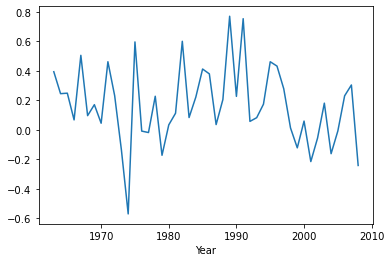

In [350]:
fig = plt.figure()
df_4['KO'].plot()
plt.show()

new = df_1.join(df_4)
new =new.dropna().drop(columns='Adj Close')


In [351]:
new.head(5),new.tail(5)

(      Mkt-RF      HML       SMB      UMD        KO
 Year                                              
 1963  0.1777  0.16385 -0.060167  0.11625  0.394325
 1964  0.1278    0.104 -0.014000  0.04720  0.245610
 1965  0.1047  0.07655  0.216167  0.20440  0.248991
 1966 -0.1344  -0.0084  0.028500  0.10325  0.067820
 1967  0.2436  -0.0848  0.504833  0.22485  0.505495,
       Mkt-RF       HML       SMB      UMD        KO
 Year                                               
 2004  0.1181   0.09735  0.049033 -0.00500 -0.161252
 2005  0.0434    0.0895 -0.022400  0.15465 -0.006612
 2006  0.1139    0.1434  0.004967 -0.07835  0.231046
 2007  0.0265  -0.12485 -0.082167  0.21380  0.304542
 2008 -0.3994   0.01005  0.041833  0.13390 -0.240990)

In [354]:
X_train = new[['Mkt-RF','HML','SMB','UMD']].iloc[:-9,:]
Y_train = new[['KO']].iloc[:-9,:]
X_test = new[['Mkt-RF','HML','SMB','UMD']].iloc[-9:,:]
Y_test = new[['KO']].iloc[-9:,:]

models = [LinearRegression(), Ridge(normalize=True),Lasso(max_iter=10000, normalize=True),RandomForestRegressor(),DecisionTreeRegressor(),SVR(kernel = 'rbf')]
list1 = []
for model in models:
    model.fit(X_train,Y_train)
    frame=pd.Series({'Model':type(model).__name__, 'MSE': mean_squared_error(model.predict(X_test), Y_test)})
    list1.append(frame)
    Table=pd.concat(list1, axis=1).T

C:\Users\DELL\AppData\Local\Temp/ipykernel_13484/2060190355.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [358]:
Table.sort_values(by=['MSE'])

,Model,MSE
5,SVR,0.042337
1,Ridge,0.043064
0,LinearRegression,0.044549
3,RandomForestRegressor,0.052378
4,DecisionTreeRegressor,0.070971
2,Lasso,0.072889
